In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_1M=pd.read_csv('train_1M.csv')

# Feature engineering sur l'experience des users

## Encodage du n° de réponse

In [4]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,categories='auto')

In [6]:
train_1M[['answernull','answer0','answer1','answer2','answer3']]=encoder.fit_transform(train_1M[['user_answer']])

In [7]:
train_1M[['answernull','answer0','answer1','answer2','answer3']]=train_1M[['answernull','answer0','answer1','answer2','answer3']].astype('int8')

## Preprocess prior_question_had_explanation

On convertit en 0/1 pour pouvoir faire des calculs (moeynnes, etc) facilement

In [8]:
train_1M.prior_question_had_explanation=train_1M.prior_question_had_explanation.apply(lambda x:1 if x==True else 0)

## Calcul du nombres d'activité du user

In [9]:
train_1M['user_activity_cumcount']=train_1M.groupby('user_id').cumcount()

(array([3.66039e+05, 1.47109e+05, 9.76390e+04, 7.00530e+04, 5.41590e+04,
        4.26450e+04, 3.29460e+04, 2.64950e+04, 2.11250e+04, 1.70400e+04,
        1.31900e+04, 1.13170e+04, 1.04780e+04, 9.21500e+03, 8.20500e+03,
        6.71200e+03, 5.69700e+03, 5.24100e+03, 4.90700e+03, 4.66400e+03,
        4.33800e+03, 3.89900e+03, 3.34000e+03, 2.64800e+03, 2.14600e+03,
        1.94400e+03, 1.81500e+03, 1.70100e+03, 1.46400e+03, 1.26600e+03,
        1.21500e+03, 1.21500e+03, 9.25000e+02, 5.90000e+02, 2.43000e+02,
        2.43000e+02, 2.43000e+02, 2.43000e+02, 2.43000e+02, 2.42000e+02,
        2.43000e+02, 2.43000e+02, 2.43000e+02, 2.43000e+02, 2.43000e+02,
        2.43000e+02, 2.43000e+02, 2.43000e+02, 2.43000e+02, 2.43000e+02]),
 array([    0. ,   242.9,   485.8,   728.7,   971.6,  1214.5,  1457.4,
         1700.3,  1943.2,  2186.1,  2429. ,  2671.9,  2914.8,  3157.7,
         3400.6,  3643.5,  3886.4,  4129.3,  4372.2,  4615.1,  4858. ,
         5100.9,  5343.8,  5586.7,  5829.6,  6072.5,  6

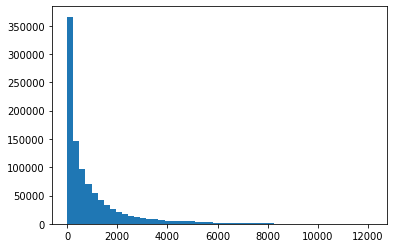

In [219]:
plt.hist(train_1M.user_activity_cumcount,bins=50)

## Est-ce qu'un même utilisateur a parfois plusieurs fois la même question ?

In [16]:
array=train_1M.query('content_type_id==0')[['user_id','content_id']].values
liste=[(array[i,0],array[i,1]) for i in range(array.shape[0])]
print('total',len(liste))
print('uniques',len(set(liste)))

total 967834
uniques 853730


Oui, sur 967k lignes avec question, il y a 114k fois où ce n'était pas la première fois que le mec voyait la question

In [17]:
train_1M['user_content_tuple']=[(train_1M.user_id.iloc[i],train_1M.content_id.iloc[i]) for i in range(len(train_1M))]
train_1M['already_seen']=train_1M.groupby('user_content_tuple').cumcount()
train_1M.drop(columns='user_content_tuple',inplace=True)
train_1M

,Unnamed: 0,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,answernull,answer0,answer1,answer2,answer3,user_activity_cumcount,already_seen
0,90286654,90286654,0,1917429896,7900,0,0,0,1,NaN,0,0,1,0,0,0,0,0
1,90286655,90286655,26511,1917429896,7876,0,1,2,0,21000.0,0,0,0,0,1,0,1,0
2,90286656,90286656,55312,1917429896,175,0,2,0,0,21000.0,0,0,1,0,0,0,2,0
3,90286657,90286657,102436,1917429896,1278,0,3,0,0,23000.0,0,0,1,0,0,0,3,0
4,90286658,90286658,188454,1917429896,2063,0,4,3,0,45000.0,0,0,0,0,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987264,47484293,47484293,1619704,1003849974,6909,0,14,0,1,17000.0,0,0,1,0,0,0,25,0
987265,47484294,47484294,1906094,1003849974,7217,0,15,2,1,68500.0,0,0,0,0,1,0,26,0
987266,47484295,47484295,1906094,1003849974,7216,0,15,3,1,68500.0,0,0,0,0,0,1,27,0
987267,47484296,47484296,1906094,1003849974,7219,0,15,2,1,68500.0,0,0,0,0,1,0,28,0


In [87]:
train_1M.query('content_type_id==0').groupby('already_seen').agg({'answered_correctly':'mean'})

,answered_correctly
already_seen,
0,0.643893
1,0.752326
2,0.751521
3,0.753501
4,0.749469
5,0.748148
6,0.695455
7,0.735294
8,0.515152


<AxesSubplot:xlabel='already_seen'>

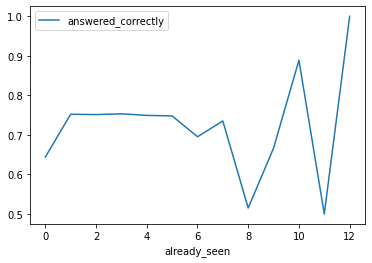

In [18]:
train_1M.query('content_type_id==0').groupby('already_seen').agg({'answered_correctly':'mean'}).plot()

In [19]:
train_1M.query('content_type_id==0')[['already_seen','row_id']].groupby('already_seen').count()

,row_id
already_seen,
0,853225
1,88899
2,18734
3,4641
4,1413
5,540
6,220
7,102
8,33


On dirait que la seule donnée pertinente concernele gap entre les questions 0 et 1 fois déjà vues. Donc en encode en 0,1 cette information : déjà vue ou non

<AxesSubplot:xlabel='already_seen'>

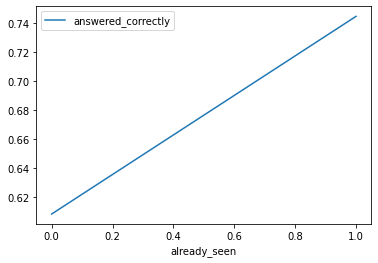

In [20]:
train_1M['already_seen']=train_1M['already_seen'].apply(lambda x:1 if x>=1 else 0)
train_1M.groupby('already_seen').agg({'answered_correctly':'mean'}).plot()

In [107]:
train_1M.groupby('already_seen').agg({'answered_correctly':'mean'})

,answered_correctly
already_seen,
0,0.608169
1,0.744669


## Est-ce que ça aide d'avoir fait des lectures ?

In [21]:
train_1M['lectures_seen']=train_1M.groupby('user_id').cumsum()['content_type_id']

In [108]:
train_1M.query('content_type_id==0').groupby('lectures_seen').mean()['answered_correctly']

lectures_seen
0      0.598523
1      0.662172
2      0.665038
3      0.655926
4      0.667197
         ...   
196    0.571429
197    0.454545
198    0.400000
199    0.625000
200    0.500000
Name: answered_correctly, Length: 201, dtype: float64

(0.0, 20.0)

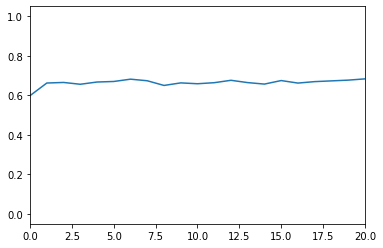

In [24]:
plt.plot(train_1M.query('content_type_id==0').groupby('lectures_seen').mean()['answered_correctly'])
plt.xlim(0,20)

(array([2.39341e+05, 6.44870e+04, 4.57540e+04, 3.64930e+04, 3.22590e+04,
        3.30310e+04, 3.06400e+04, 2.41120e+04, 2.35780e+04, 1.93100e+04,
        1.65870e+04, 1.65970e+04, 1.66560e+04, 1.53500e+04, 1.29580e+04,
        1.18120e+04, 1.08790e+04, 9.31200e+03, 1.08010e+04, 1.09010e+04,
        1.22960e+04, 8.60600e+03, 7.63600e+03, 7.17100e+03, 7.97800e+03,
        7.89000e+03, 7.48200e+03, 8.00400e+03, 7.08900e+03, 6.25700e+03,
        1.16940e+04, 8.86600e+03, 6.34900e+03, 5.36300e+03, 4.96000e+03,
        7.18800e+03, 5.99400e+03, 5.47800e+03, 6.40700e+03, 3.18200e+03,
        3.28700e+03, 3.38800e+03, 2.49300e+03, 3.04700e+03, 3.96600e+03,
        4.13800e+03, 3.07800e+03, 4.02000e+03, 3.80600e+03, 2.87900e+03,
        4.13900e+03, 2.87200e+03, 2.62800e+03, 2.88400e+03, 2.27000e+03,
        2.14600e+03, 3.15200e+03, 3.20100e+03, 2.24000e+03, 1.92200e+03,
        2.14900e+03, 1.96300e+03, 1.85900e+03, 1.87000e+03, 1.64700e+03,
        1.43000e+03, 3.36800e+03, 1.88300e+03, 1.90

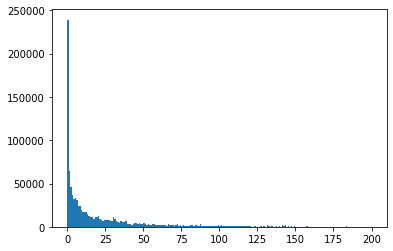

In [97]:
plt.hist(train_1M['lectures_seen'],bins=200)

Ca semble aider d'avoir fait au moins une lecture (par rapport à aucune). Au delà, pas d'effet.

In [25]:
train_1M['at_least_one_lesson']=train_1M.lectures_seen.apply(lambda x:1 if x>=1 else 0)

## Présence d'une lecture dans le même task_container_id

In [30]:
train_1M['lectures_seen_in_same_task_container']=train_1M.groupby(['user_id','task_container_id']).cumsum()['content_type_id']
train_1M.query('lectures_seen_in_same_task_container==1')

,Unnamed: 0,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,...,answernull,answer0,answer1,answer2,answer3,user_activity_cumcount,already_seen,lectures_seen,at_least_one_lesson,lectures_seen_in_same_task_container
220,67469522,67469522,78253870,1434805831,10852,1,70,-1,-1,NaN,...,1,0,0,0,0,82,0,1,1,1
243,67469545,67469545,80279572,1434805831,1501,1,92,-1,-1,NaN,...,1,0,0,0,0,105,0,2,1,1
387,67469689,67469689,350318784,1434805831,28621,1,174,-1,-1,NaN,...,1,0,0,0,0,249,0,3,1,1
414,67469716,67469716,351893349,1434805831,7926,1,201,-1,-1,NaN,...,1,0,0,0,0,276,0,4,1,1
452,67469754,67469754,576295410,1434805831,18545,1,226,-1,-1,NaN,...,1,0,0,0,0,314,0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987055,63279116,63279116,200508471,1344826133,28034,1,330,-1,-1,NaN,...,1,0,0,0,0,482,0,11,1,1
987070,63279131,63279131,1480802005,1344826133,24570,1,344,-1,-1,NaN,...,1,0,0,0,0,497,0,12,1,1
987081,63279142,63279142,1481316434,1344826133,28621,1,355,-1,-1,NaN,...,1,0,0,0,0,508,0,13,1,1
987188,79306132,79306132,244937135,1688465627,32312,1,74,-1,-1,NaN,...,1,0,0,0,0,73,0,1,1,1


In [34]:
train_1M.query('user_id==1434805831').head(60)

,Unnamed: 0,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,...,answernull,answer0,answer1,answer2,answer3,user_activity_cumcount,already_seen,lectures_seen,at_least_one_lesson,lectures_seen_in_same_task_container
138,67469440,67469440,0,1434805831,7900,0,0,0,1,NaN,...,0,1,0,0,0,0,0,0,0,0
139,67469441,67469441,31457,1434805831,7876,0,1,0,0,22000.0,...,0,1,0,0,0,1,0,0,0,0
140,67469442,67469442,59258,1434805831,175,0,2,2,1,29000.0,...,0,0,0,1,0,2,0,0,0,0
141,67469443,67469443,89332,1434805831,1278,0,3,1,0,25000.0,...,0,0,1,0,0,3,0,0,0,0
142,67469444,67469444,202992,1434805831,2065,0,4,2,1,27000.0,...,0,0,0,1,0,4,0,0,0,0
143,67469445,67469445,202992,1434805831,2064,0,4,2,0,27000.0,...,0,0,0,1,0,5,0,0,0,0
144,67469446,67469446,202992,1434805831,2063,0,4,2,0,27000.0,...,0,0,0,1,0,6,0,0,0,0
145,67469447,67469447,276412,1434805831,3363,0,5,0,0,25666.0,...,0,1,0,0,0,7,0,0,0,0
146,67469448,67469448,276412,1434805831,3364,0,5,1,1,25666.0,...,0,0,1,0,0,8,0,0,0,0
147,67469449,67469449,276412,1434805831,3365,0,5,3,0,25666.0,...,0,0,0,0,1,9,0,0,0,0


(array([967834.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  19435.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

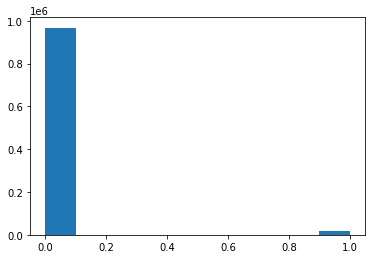

In [131]:
plt.hist(train_1M.lectures_seen_in_same_task_container)

Problème : les lectures semblent toujours seules dans leur task_container, donc on ne peut pas utiliser ce feature

## Taux de bonne réponses cumulé de l'user

# Feature engineering sur questions.csv avec les données de train_1M

On fait du features engineeringquestion par question sur la base des infos d'historique contenues dans le subset de données de 1 million train_csv (y compris celles créée ci-dessus)

## Stats globales par question : % de correct, mean time, etc

In [217]:
train_1M

,Unnamed: 0,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,...,answernull,answer0,answer1,answer2,answer3,user_activity_cumcount,already_seen,lectures_seen,at_least_one_lesson,lectures_seen_in_same_task_container
0,90286654,90286654,0,1917429896,7900,0,0,0,1,NaN,...,0,1,0,0,0,0,0,0,0,0
1,90286655,90286655,26511,1917429896,7876,0,1,2,0,21000.0,...,0,0,0,1,0,1,0,0,0,0
2,90286656,90286656,55312,1917429896,175,0,2,0,0,21000.0,...,0,1,0,0,0,2,0,0,0,0
3,90286657,90286657,102436,1917429896,1278,0,3,0,0,23000.0,...,0,1,0,0,0,3,0,0,0,0
4,90286658,90286658,188454,1917429896,2063,0,4,3,0,45000.0,...,0,0,0,0,1,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987264,47484293,47484293,1619704,1003849974,6909,0,14,0,1,17000.0,...,0,1,0,0,0,25,0,0,0,0
987265,47484294,47484294,1906094,1003849974,7217,0,15,2,1,68500.0,...,0,0,0,1,0,26,0,0,0,0
987266,47484295,47484295,1906094,1003849974,7216,0,15,3,1,68500.0,...,0,0,0,0,1,27,0,0,0,0
987267,47484296,47484296,1906094,1003849974,7219,0,15,2,1,68500.0,...,0,0,0,1,0,28,0,0,0,0


In [243]:
questions_stats=train_1M.query('content_type_id==0').groupby('content_id').agg({'answered_correctly': 'mean',
                                                'content_type_id': 'count',
                                                'task_container_id': 'mean',
                                                'user_answer':'max',
                                                'timestamp': 'mean',
                                                'user_activity_cumcount': 'mean',
                                                 'prior_question_had_explanation': 'mean',
                                                 'prior_question_elapsed_time': 'mean',
                                                 'answer0': 'mean',
                                                 'answer1': 'mean',
                                                 'answer2': 'mean',
                                                 'answer3': 'mean',
                                                               })

In [169]:
questions_stats.rename(columns={'content_type_id':'count',
                                'user_answer':'answers'},inplace=True)

In [170]:
questions_stats

,answered_correctly,count,task_container_id,answers,timestamp,user_activity_cumcount,prior_question_had_explanation,prior_question_elapsed_time,answer0,answer1,answer2,answer3
content_id,,,,,,,,,,,,
0,0.886076,79,516.075949,3,8.991699e+09,662.481013,0.962025,21746.835443,0.886076,0.063291,0.012658,0.037975
1,0.842857,70,607.800000,3,9.469249e+09,798.971429,1.000000,20214.285714,0.114286,0.842857,0.014286,0.028571
2,0.544355,496,293.594758,3,4.552578e+09,384.544355,0.883065,23495.594758,0.544355,0.016129,0.157258,0.282258
3,0.741935,217,462.940092,3,5.898622e+09,606.815668,0.940092,23127.336406,0.741935,0.009217,0.023041,0.225806
4,0.612378,307,262.973941,3,4.333422e+09,349.990228,0.469055,23797.553746,0.061889,0.179153,0.146580,0.612378
...,...,...,...,...,...,...,...,...,...,...,...,...
13518,0.857143,7,2329.714286,3,1.941301e+10,2521.142857,1.000000,20857.142857,0.000000,0.000000,0.142857,0.857143
13519,0.500000,6,1593.666667,3,2.356377e+10,1680.166667,1.000000,13000.000000,0.000000,0.500000,0.000000,0.500000
13520,0.555556,9,2262.888889,3,2.417656e+10,2518.333333,1.000000,16555.555556,0.111111,0.111111,0.555556,0.222222


In [171]:
questions_stats.to_csv('questions_stats_1M')

## Stats en distingant correctly answered or not

In [172]:
correctly_answered_questions_lines=train_1M.query('content_type_id==0').query('answered_correctly==1')
uncorrectly_answered_questions_lines=train_1M.query('content_type_id==0').query('answered_correctly==0')

In [173]:
questions_stats_correct=correctly_answered_questions_lines\
                    .groupby('content_id').agg({'task_container_id': 'mean',
                                                'timestamp': 'mean',
                                                'user_activity_cumcount': 'mean',
                                                'prior_question_elapsed_time': 'mean',
                                                               })

In [174]:
questions_stats_correct

,task_container_id,timestamp,user_activity_cumcount,prior_question_elapsed_time
content_id,,,,
0,485.514286,8.047382e+09,631.914286,20985.714286
1,642.932203,1.047701e+10,855.711864,20288.135593
2,354.259259,4.597248e+09,458.581481,22961.725926
3,500.875776,5.236123e+09,656.316770,23451.130435
4,271.462766,4.564588e+09,363.058511,23819.675532
...,...,...,...,...
13518,2709.000000,2.254764e+10,2932.333333,20500.000000
13519,2262.666667,3.359483e+10,2275.666667,11333.333333
13520,2211.600000,3.759258e+10,2670.000000,19600.000000


In [175]:
questions_stats_uncorrect=uncorrectly_answered_questions_lines\
                    .groupby('content_id').agg({'task_container_id': 'mean',
                                                'timestamp': 'mean',
                                                'user_activity_cumcount': 'mean',
                                                'prior_question_elapsed_time': 'mean',
                                                               })

## Stats en distingant ceux qui avaient eu l'explication

In [176]:
questions_lines_having_had_explanation=train_1M.query('content_type_id==0').query('prior_question_had_explanation==1')
questions_lines_having_not_had_explanation=train_1M.query('content_type_id==0').query('prior_question_had_explanation==0')

In [177]:
questions_stats_having_had_explanation=questions_lines_having_had_explanation\
                    .groupby('content_id').agg({'answered_correctly': ['mean']})
questions_stats_having_not_had_explanation=questions_lines_having_not_had_explanation\
                    .groupby('content_id').agg({'answered_correctly': ['mean']})

In [220]:
questions_stats

,answered_correctly,count,task_container_id,answers,timestamp,user_activity_cumcount,prior_question_had_explanation,prior_question_elapsed_time,answer0,answer1,...,answered_correctly_knowing_having_had_explanation,answered_correctly_knowing_having_not_had_explanation,task_container_id_knowing_answered_correctly,timestamp_knowing_answered_correctly,user_activity_cumcount_knowing_answered_correctly,prior_question_elapsed_time_knowing_answered_correctly,task_container_id_knowing_answered_uncorrectly,timestamp_knowing_answered_uncorrectly,user_activity_cumcount_knowing_answered_uncorrectly,prior_question_elapsed_time_knowing_answered_uncorrectly
content_id,,,,,,,,,,,,,,,,,,,,,
0,0.886076,79,516.075949,3,8.991699e+09,662.481013,0.962025,21746.835443,0.886076,0.063291,...,0.894737,0.666667,485.514286,8.047382e+09,631.914286,20985.714286,753.777778,1.633639e+10,900.222222,27666.666667
1,0.842857,70,607.800000,3,9.469249e+09,798.971429,1.000000,20214.285714,0.114286,0.842857,...,0.842857,NaN,642.932203,1.047701e+10,855.711864,20288.135593,419.363636,4.063987e+09,494.636364,19818.181818
2,0.544355,496,293.594758,3,4.552578e+09,384.544355,0.883065,23495.594758,0.544355,0.016129,...,0.570776,0.344828,354.259259,4.597248e+09,458.581481,22961.725926,221.119469,4.499212e+09,296.092920,24133.402655
3,0.741935,217,462.940092,3,5.898622e+09,606.815668,0.940092,23127.336406,0.741935,0.009217,...,0.754902,0.538462,500.875776,5.236123e+09,656.316770,23451.130435,353.875000,7.803308e+09,464.500000,22196.428571
4,0.612378,307,262.973941,3,4.333422e+09,349.990228,0.469055,23797.553746,0.061889,0.179153,...,0.666667,0.564417,271.462766,4.564588e+09,363.058511,23819.675532,249.563025,3.968218e+09,329.344538,23762.605042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,0.857143,7,2329.714286,3,1.941301e+10,2521.142857,1.000000,20857.142857,0.000000,0.000000,...,0.857143,NaN,2709.000000,2.254764e+10,2932.333333,20500.000000,54.000000,6.052224e+08,54.000000,23000.000000
13519,0.500000,6,1593.666667,3,2.356377e+10,1680.166667,1.000000,13000.000000,0.000000,0.500000,...,0.500000,NaN,2262.666667,3.359483e+10,2275.666667,11333.333333,924.666667,1.353271e+10,1084.666667,14666.666667
13520,0.555556,9,2262.888889,3,2.417656e+10,2518.333333,1.000000,16555.555556,0.111111,0.111111,...,0.555556,NaN,2211.600000,3.759258e+10,2670.000000,19600.000000,2327.000000,7.406536e+09,2328.750000,12750.000000


## Concatenation de tous les features sur questions_stats

In [179]:
questions_stats['answered_correctly_knowing_having_had_explanation']=questions_stats_having_had_explanation.answered_correctly
questions_stats['answered_correctly_knowing_having_not_had_explanation']=questions_stats_having_not_had_explanation.answered_correctly

In [186]:
questions_stats.shape

(13066, 22)

In [182]:
questions_stats[['task_container_id_knowing_answered_correctly',
                'timestamp_knowing_answered_correctly',
                'user_activity_cumcount_knowing_answered_correctly',
                'prior_question_elapsed_time_knowing_answered_correctly']]=\
        questions_stats_correct[['task_container_id',
                                 'timestamp',
                                 'user_activity_cumcount',
                                 'prior_question_elapsed_time']]

In [183]:
questions_stats[['task_container_id_knowing_answered_uncorrectly',
                'timestamp_knowing_answered_uncorrectly',
                'user_activity_cumcount_knowing_answered_uncorrectly',
                'prior_question_elapsed_time_knowing_answered_uncorrectly']]=\
        questions_stats_uncorrect[['task_container_id',
                                 'timestamp',
                                 'user_activity_cumcount',
                                 'prior_question_elapsed_time']]

In [184]:
questions_stats.shape

(13066, 22)

### Investigations sur la pertinence des features de stats par question

#### Timestamp

In [189]:
diff=questions_stats['timestamp_knowing_answered_correctly']\
    -questions_stats['timestamp_knowing_answered_uncorrectly']

In [192]:
diff.mean()

492316598.52147335

In [193]:
diff.std()

7321768955.879935

In [196]:
z0=diff.mean()/diff.std()
z0

0.0672401166286606

(array([3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 5.000e+00,
        3.000e+00, 5.000e+00, 2.000e+00, 6.000e+00, 1.000e+00, 6.000e+00,
        3.000e+00, 1.500e+01, 1.100e+01, 2.000e+01, 2.000e+01, 1.800e+01,
        1.900e+01, 2.300e+01, 2.800e+01, 4.600e+01, 5.400e+01, 6.300e+01,
        8.700e+01, 1.190e+02, 2.090e+02, 3.270e+02, 5.220e+02, 8.270e+02,
        1.440e+03, 1.938e+03, 1.837e+03, 1.430e+03, 9.370e+02, 6.040e+02,
        3.890e+02, 2.510e+02, 1.650e+02, 8.600e+01, 5.400e+01, 5.100e+01,
        4.400e+01, 3.500e+01, 2.200e+01, 2.700e+01, 2.000e+01, 1.900e+01,
        1.000e+01, 1.000e+01, 9.000e+00, 1.400e+01, 8.000e+00, 4.000e+00,
        5.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

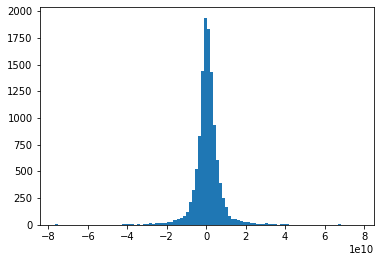

In [191]:
plt.hist(diff,bins=100)

#### Task_container_id

In [197]:
diff_tci=questions_stats['task_container_id_knowing_answered_correctly']\
    -questions_stats['task_container_id_knowing_answered_uncorrectly']

In [198]:
z0=diff_tci.mean()/diff_tci.std()
z0

0.31754252206155104

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 5.000e+00, 4.000e+00, 4.000e+00, 4.000e+00, 4.000e+00,
        4.000e+00, 6.000e+00, 3.000e+00, 1.000e+01, 7.000e+00, 9.000e+00,
        9.000e+00, 1.300e+01, 1.100e+01, 1.600e+01, 2.800e+01, 1.700e+01,
        3.500e+01, 5.800e+01, 6.100e+01, 8.600e+01, 9.300e+01, 1.220e+02,
        1.980e+02, 2.900e+02, 4.390e+02, 7.480e+02, 1.283e+03, 1.848e+03,
        1.613e+03, 1.223e+03, 9.500e+02, 7.100e+02, 5.100e+02, 3.680e+02,
        2.530e+02, 1.900e+02, 1.280e+02, 9.600e+01, 7.600e+01, 5.900e+01,
        5.600e+01, 4.700e+01, 3.300e+01, 3.200e+01, 2.800e+01, 1.300e+01,
        1.700e+01, 1.100e+01, 1.100e+0

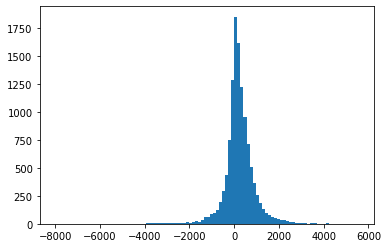

In [199]:
plt.hist(diff_tci,bins=100)

Conclusion : le task_container_id semble plus intéressant car il permet mieux de distinguer les bonnes et les mauvaises réponses que le timestamp

#### User_activity_cumcount

In [200]:
diff_uac=questions_stats['user_activity_cumcount_knowing_answered_correctly']\
    -questions_stats['user_activity_cumcount_knowing_answered_uncorrectly']

In [201]:
z0=diff_uac.mean()/diff_uac.std()
z0

0.3120303571460969

(array([2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 5.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 4.000e+00, 6.000e+00, 4.000e+00, 4.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 1.000e+01, 6.000e+00, 5.000e+00,
        1.500e+01, 7.000e+00, 1.400e+01, 1.900e+01, 1.800e+01, 3.300e+01,
        3.400e+01, 5.500e+01, 5.300e+01, 7.700e+01, 9.100e+01, 1.300e+02,
        1.840e+02, 2.810e+02, 3.860e+02, 6.450e+02, 1.136e+03, 1.740e+03,
        1.688e+03, 1.352e+03, 1.009e+03, 7.790e+02, 5.190e+02, 4.040e+02,
        2.800e+02, 2.080e+02, 1.320e+02, 1.140e+02, 7.600e+01, 5.900e+01,
        6.500e+01, 4.700e+01, 3.200e+01, 3.200e+01, 2.200e+01, 2.800e+01,
        8.000e+00, 1.200e+01, 1.300e+0

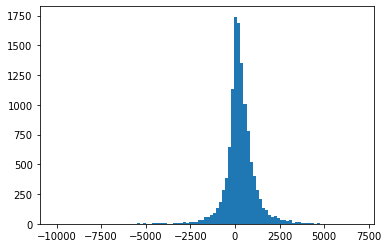

In [202]:
plt.hist(diff_uac,bins=100)

Conclusion : le user_activity_cumcount semble assez similaire au task_container_id en terme de répartitions

#### Had explanation

In [203]:
diff_he=questions_stats['answered_correctly_knowing_having_had_explanation']\
    -questions_stats['answered_correctly_knowing_having_not_had_explanation']

(array([  4.,   0.,   0.,   0.,   0.,   1.,   1.,   4.,   2.,   1.,   3.,
          3.,   5.,   8.,   7.,   8.,  15.,   6.,   9.,  12.,  16.,  22.,
         23.,  29.,  23.,  61.,  43.,  44.,  66.,  54.,  89.,  93., 107.,
        143., 151., 123., 160., 200., 205., 196., 244., 247., 240., 245.,
        252., 238., 293., 230., 204., 149., 287., 149., 175., 164., 182.,
        176., 182., 145., 147., 155., 143., 145., 124., 122., 111., 116.,
        101.,  98.,  81.,  88.,  55.,  68.,  59.,  51.,  41.,  77.,  47.,
         37.,  42.,  50.,  39.,  33.,  31.,  62.,  42.,  65.,  57.,  53.,
         47.,  28.,  45.,  28.,  31.,  23.,   8.,  13.,  12.,  10.,   3.,
         25.]),
 array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
        -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
        -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
        -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
        -0.28, -0.26, -0.24, -0.22

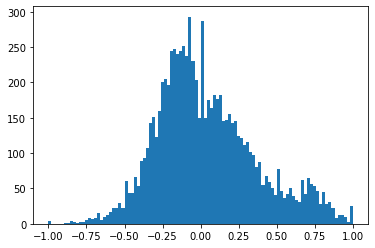

In [204]:
plt.hist(diff_he,bins=100)

In [210]:
diff_he.describe()

count    8352.000000
mean        0.039968
std         0.329738
min        -1.000000
25%        -0.187587
50%        -0.015132
75%         0.230503
max         1.000000
dtype: float64

In [ ]:
La distribution est très surprenante :
    -la médiane est négative, ce qui signifie que pour la plupart des questions, le fait d'avoir eu l'explication n'a pas amélioré le score moyen des élèves
    -la moyenne est positive, comme on peut s'y attendre : en moyenne cela a aidé
    
Attention unbalanced data !
        -Seules 10%des lignes concernent des utilisateurs qui n'avaient pas eu l'explication
        -Pour de nombreuses questions (5000 sur 13000) on ne peut pas comparer le taux moyen de bonnes réponses avec et sans explications, car on a aucun exemple de cas sans explication

Conclusion : il semblerait que pour de nombreuses questions, le fait de voir l'explication aide l'utilisateur, et pour un nombre encore plus grand, cela l'embrouille
    Je propose de :
        - conserver ces 2 colonnes (% correct avec et sans explication)
        - compléter les NaN de la seconde par la valeur de la première
        - dans la table train, créer un feature 'proba correct knowing the fact that the student has had the explaination or not'
        - tester avec ce feature, et comparer avec l'equivalent global (%global de correct sachant explication, toutes questions confondues)

## Correlations des stats par questions

In [14]:
import seaborn as sns

<AxesSubplot:>

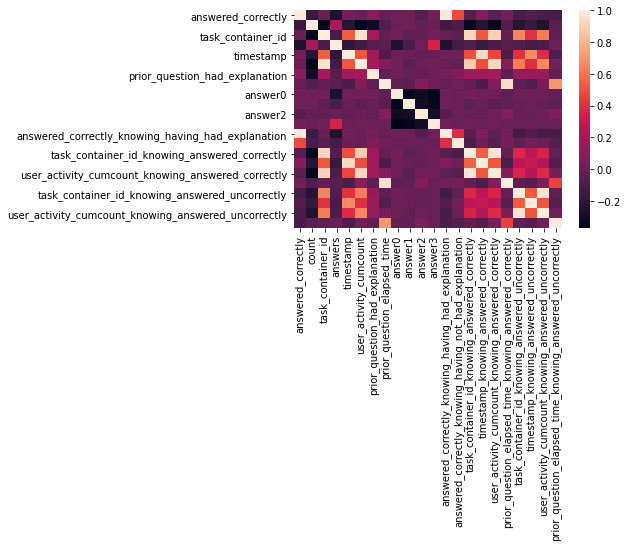

In [194]:
sns.heatmap(questions_stats.corr())

In [195]:
questions_stats.corr().answered_correctly

answered_correctly                                          1.000000
count                                                      -0.162240
task_container_id                                          -0.009096
answers                                                    -0.257114
timestamp                                                   0.030368
user_activity_cumcount                                      0.003224
prior_question_had_explanation                              0.099103
prior_question_elapsed_time                                -0.007275
answer0                                                     0.016075
answer1                                                     0.011170
answer2                                                    -0.060341
answer3                                                     0.028244
answered_correctly_knowing_having_had_explanation           0.990255
answered_correctly_knowing_having_not_had_explanation       0.483841
task_container_id_knowing_answered

## Merge des statistiques par question avec le train_1M

# Exploration question typique

In [216]:
typical_question_id=train_1M.iloc[400000].content_id
train_1M.query('content_id==@typical_question_id')

,Unnamed: 0,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,...,answernull,answer0,answer1,answer2,answer3,user_activity_cumcount,already_seen,lectures_seen,at_least_one_lesson,lectures_seen_in_same_task_container
2139,53323503,53323503,3531386007,1130932128,7306,0,556,2,1,31000.0,...,0,0,0,1,0,799,0,29,1,0
34322,94881264,94881264,3723770906,2014448264,7306,0,529,0,0,111400.0,...,0,1,0,0,0,932,0,21,1,0
127616,50905192,50905192,2552655942,1078356460,7306,0,528,2,1,87000.0,...,0,0,0,1,0,1139,0,4,1,0
164431,70770029,70770029,12330739221,1505845771,7306,0,711,3,0,68000.0,...,0,0,0,0,1,995,0,26,1,0
168734,32208943,32208943,2456792692,689987651,7306,0,312,2,1,88000.0,...,0,0,0,1,0,497,0,7,1,0
170061,37794437,37794437,45981441565,806458020,7306,0,379,2,1,61800.0,...,0,0,0,1,0,669,0,20,1,0
188290,14196637,14196637,2337355456,307356466,7306,0,582,2,1,34666.0,...,0,0,0,1,0,1689,0,46,1,0
273374,50709454,50709454,4076551724,1074246041,7306,0,572,1,0,1000.0,...,0,0,1,0,0,1726,0,62,1,0
322950,63192588,63192588,1034283851,1343052354,7306,0,125,2,1,37000.0,...,0,0,0,1,0,399,0,13,1,0
334458,4753799,4753799,1662715223,101015055,7306,0,200,0,0,66000.0,...,0,1,0,0,0,504,0,18,1,0


/Users/thomasmathieu/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/thomasmathieu/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(close=None, block=None)>

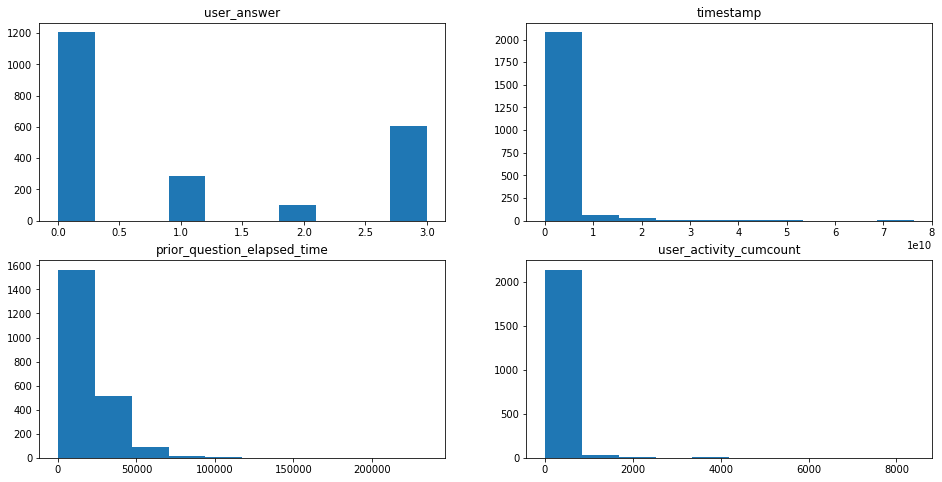

In [38]:
subset=train_1M.query('content_id==@question_id')

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.hist(subset.user_answer)
plt.title('user_answer')

plt.subplot(2,2,2)
plt.hist(subset.timestamp)
plt.title('timestamp')

plt.subplot(2,2,3)
plt.hist(subset.prior_question_elapsed_time)
plt.title('prior_question_elapsed_time')

plt.subplot(2,2,4)
plt.hist(subset.user_activity_cumcount)
plt.title('user_activity_cumcount')

plt.show


In [17]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter()

# Exploration utilisateur typique

In [66]:
max_count=train_1M.user_activity_cumcount.max()
most_active_user_id=train_1M.query('user_activity_cumcount==@max_count').user_id.values[0]
train_1M.query('user_id==@most_active_user_id').head(60)

,Unnamed: 0,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,answernull,answer0,answer1,answer2,answer3,user_activity_cumcount
505408,77105331,77105331,0,1641944791,6068,0,0,3,0,NaN,0,0,0,0,0,1,0
505409,77105332,77105332,82826,1641944791,4265,0,1,1,0,50000.0,0,0,0,1,0,0,1
505410,77105333,77105333,102392,1641944791,4305,0,2,1,0,18000.0,0,0,0,1,0,0,2
505411,77105334,77105334,118843,1641944791,4067,0,3,1,1,16000.0,0,0,0,1,0,0,3
505412,77105335,77105335,138018,1641944791,4748,0,4,1,0,13000.0,0,0,0,1,0,0,4
505413,77105336,77105336,166859,1641944791,4544,0,5,1,0,16000.0,0,0,0,1,0,0,5
505414,77105337,77105337,179772,1641944791,5183,0,6,2,0,26000.0,0,0,0,0,1,0,6
505415,77105338,77105338,337278,1641944791,481,0,7,0,1,10000.0,0,0,1,0,0,0,7
505416,77105339,77105339,364937,1641944791,472,0,8,0,1,20000.0,1,0,1,0,0,0,8
505417,77105340,77105340,392769,1641944791,1339,0,9,1,1,19000.0,1,0,0,1,0,0,9


In [215]:
typical_user_id=train_1M.iloc[500000].user_id
train_1M.query('user_id==@typical_user_id')

,Unnamed: 0,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,...,answernull,answer0,answer1,answer2,answer3,user_activity_cumcount,already_seen,lectures_seen,at_least_one_lesson,lectures_seen_in_same_task_container
495837,80989069,80989069,0,1723430159,4961,0,0,2,0,NaN,...,0,0,0,1,0,0,0,0,0,0
495838,80989070,80989070,9205,1723430159,4065,0,1,0,0,11000.0,...,0,1,0,0,0,1,0,0,0,0
495839,80989071,80989071,26006,1723430159,5141,0,2,1,1,6000.0,...,0,0,1,0,0,2,0,0,0,0
495840,80989072,80989072,58613,1723430159,4750,0,3,3,0,14000.0,...,0,0,0,0,1,3,0,0,0,0
495841,80989073,80989073,79487,1723430159,5687,0,4,3,1,30000.0,...,0,0,0,0,1,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501131,80994363,80994363,13474258932,1723430159,11876,0,5294,0,0,16000.0,...,0,1,0,0,0,5294,1,98,1,0
501132,80994364,80994364,13474278813,1723430159,13347,0,5295,2,0,16000.0,...,0,0,0,1,0,5295,1,98,1,0
501133,80994365,80994365,13474302547,1723430159,12039,0,5296,1,0,5000.0,...,0,0,1,0,0,5296,1,98,1,0
501134,80994366,80994366,13601517336,1723430159,12252,0,5297,1,0,16000.0,...,0,0,1,0,0,5297,0,98,1,0


# Features engineering tags

In [48]:
questions=pd.read_csv('../data/questions.csv')
lectures=pd.read_csv('../data/lectures.csv')

In [49]:
questions=pd.read_csv('../data/questions.csv')
questions.tags=questions.tags.apply(lambda x:str(x).split())
liste=questions.tags.to_list()
lengths=[len(tags) for tags in liste]
max(lengths)

6

In [87]:
questions.dtypes

question_id        int64
bundle_id          int64
correct_answer     int64
part               int64
tags              object
tag1              object
tag2              object
tag3              object
tag4              object
tag5              object
tag6              object
tag1_lecture       int64
tag2_lecture       int64
tag3_lecture       int64
tag4_lecture       int64
tag5_lecture       int64
tag6_lecture       int64
dtype: object

In [88]:
tag_lectures=lectures[['lecture_id','tag']].set_index('tag')

In [92]:
lectures

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept


In [106]:
for tags in list(questions.tags.values)

[['51', '131', '162', '38'],
 ['131', '36', '81'],
 ['131', '101', '162', '92'],
 ['131', '149', '162', '29'],
 ['131', '5', '162', '38'],
 ['131', '149', '162', '81'],
 ['10', '94', '162', '92'],
 ['61', '110', '162', '29'],
 ['131', '13', '162', '92'],
 ['10', '164', '81'],
 ['131', '36', '38'],
 ['51', '131', '81'],
 ['51', '131', '92'],
 ['131', '5', '29'],
 ['131', '101', '38'],
 ['61', '110', '81'],
 ['131', '99', '92'],
 ['131', '93', '162', '29'],
 ['61', '110', '92'],
 ['10', '70', '162', '81'],
 ['131', '149', '162', '38'],
 ['9', '10', '162', '81'],
 ['131', '5', '92'],
 ['9', '10', '29'],
 ['9', '10', '38'],
 ['9', '10', '81'],
 ['131', '104', '162', '92'],
 ['9', '10', '29'],
 ['131', '104', '92'],
 ['131', '13', '162', '81'],
 ['51', '131', '162', '38'],
 ['131', '40', '162', '81'],
 ['131', '104', '162', '92'],
 ['131', '93', '162', '38'],
 ['9', '10', '92'],
 ['131', '5', '81'],
 ['131', '149', '162', '38'],
 ['131', '40', '81'],
 ['10', '70', '162', '92'],
 ['10', '94'

In [102]:
list(tag_lectures.loc[159].values.ravel())

[89, 10010, 22619, 30687]

In [82]:
liste=questions.tags.to_list()
liste6=[]
for tags in liste:
    liste6.append([-1,-1,-1,-1,-1,-1])
    for i,tag in enumerate(tags):
        try:
            liste6[-1][i]=lectures[['lecture_id','tag']].set_index('tag')[tag]
        except:
            pass
tags6=np.array(liste6)

In [83]:
questions[['tag1_lecture','tag2_lecture','tag3_lecture','tag4_lecture','tag5_lecture','tag6_lecture']]=tags6
questions

,question_id,bundle_id,correct_answer,part,tags,tag1,tag2,tag3,tag4,tag5,tag6,tag1_lecture,tag2_lecture,tag3_lecture,tag4_lecture,tag5_lecture,tag6_lecture
0,0,0,0,1,"[51, 131, 162, 38]",51,131,162,38,-1,-1,-1,-1,-1,-1,-1,-1
1,1,1,1,1,"[131, 36, 81]",131,36,81,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,2,2,0,1,"[131, 101, 162, 92]",131,101,162,92,-1,-1,-1,-1,-1,-1,-1,-1
3,3,3,0,1,"[131, 149, 162, 29]",131,149,162,29,-1,-1,-1,-1,-1,-1,-1,-1
4,4,4,3,1,"[131, 5, 162, 38]",131,5,162,38,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,13518,13518,3,5,[14],14,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
13519,13519,13519,3,5,[8],8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
13520,13520,13520,2,5,[73],73,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
13521,13521,13521,0,5,[125],125,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [84]:
questions.head(60)

,question_id,bundle_id,correct_answer,part,tags,tag1,tag2,tag3,tag4,tag5,tag6,tag1_lecture,tag2_lecture,tag3_lecture,tag4_lecture,tag5_lecture,tag6_lecture
0,0,0,0,1,"[51, 131, 162, 38]",51,131,162,38,-1,-1,-1,-1,-1,-1,-1,-1
1,1,1,1,1,"[131, 36, 81]",131,36,81,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,2,2,0,1,"[131, 101, 162, 92]",131,101,162,92,-1,-1,-1,-1,-1,-1,-1,-1
3,3,3,0,1,"[131, 149, 162, 29]",131,149,162,29,-1,-1,-1,-1,-1,-1,-1,-1
4,4,4,3,1,"[131, 5, 162, 38]",131,5,162,38,-1,-1,-1,-1,-1,-1,-1,-1
5,5,5,2,1,"[131, 149, 162, 81]",131,149,162,81,-1,-1,-1,-1,-1,-1,-1,-1
6,6,6,2,1,"[10, 94, 162, 92]",10,94,162,92,-1,-1,-1,-1,-1,-1,-1,-1
7,7,7,0,1,"[61, 110, 162, 29]",61,110,162,29,-1,-1,-1,-1,-1,-1,-1,-1
8,8,8,3,1,"[131, 13, 162, 92]",131,13,162,92,-1,-1,-1,-1,-1,-1,-1,-1
9,9,9,3,1,"[10, 164, 81]",10,164,81,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [76]:
lis=tags6.ravel()
set(list(lis))

{'-1',
 '0',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',


In [ ]:
liste=questions.tags.to_list()
liste=[]
for tags in liste:
    for i,tag in enumerate(tags):
        try:
            liste6[-1][i]=lectures[['lecture_id','tag']].set_index('tag')[tag]
        except:
            pass
tags6=np.array(liste6)

In [55]:
lectures.tag.describe()

count    418.000000
mean      94.480861
std       53.586487
min        0.000000
25%       50.250000
50%       94.500000
75%      140.000000
max      187.000000
Name: tag, dtype: float64

# Ménage dans les features

In [37]:
train_1M_clean=train_1M.drop(columns=['Unnamed: 0','answernull','user_answer','lectures_seen_in_same_task_container'])
train_1M_clean

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,answer0,answer1,answer2,answer3,user_activity_cumcount,already_seen,lectures_seen,at_least_one_lesson
0,90286654,0,1917429896,7900,0,0,1,NaN,0,1,0,0,0,0,0,0,0
1,90286655,26511,1917429896,7876,0,1,0,21000.0,0,0,0,1,0,1,0,0,0
2,90286656,55312,1917429896,175,0,2,0,21000.0,0,1,0,0,0,2,0,0,0
3,90286657,102436,1917429896,1278,0,3,0,23000.0,0,1,0,0,0,3,0,0,0
4,90286658,188454,1917429896,2063,0,4,0,45000.0,0,0,0,0,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987264,47484293,1619704,1003849974,6909,0,14,1,17000.0,0,1,0,0,0,25,0,0,0
987265,47484294,1906094,1003849974,7217,0,15,1,68500.0,0,0,0,1,0,26,0,0,0
987266,47484295,1906094,1003849974,7216,0,15,1,68500.0,0,0,0,0,1,27,0,0,0
987267,47484296,1906094,1003849974,7219,0,15,1,68500.0,0,0,0,1,0,28,0,0,0


# Idem avec le full train set

## Attention : trop gourmand en RAM, à faire tourner plus tard

In [11]:
train=pd.read_csv('../data/train.csv')
train[['answernull','answer0','answer1','answer2','answer3']]=encoder.fit_transform(train[['user_answer']])
train[['answernull','answer0','answer1','answer2','answer3']]=train[['answernull','answer0','answer1','answer2','answer3']].astype('int8')
train.prior_question_had_explanation=train.prior_question_had_explanation.apply(lambda x:1 if x==True else 0)

questions_stats_100M=train.query('content_type_id==0').groupby('content_id').agg({'content_type_id': 'count',
                                                                'task_container_id': ['min','max'],
                                                                'timestamp': 'mean',
                                                                 'answered_correctly': 'mean',
                                                                 'prior_question_had_explanation': 'mean',
                                                                 'prior_question_elapsed_time': 'mean',
                                                                 'answer0': 'mean',
                                                                 'answer1': 'mean',
                                                                 'answer2': 'mean',
                                                                 'answer3': 'mean',
                                                               })
questions_stats_100M.rename(columns={'content_type_id':'count'},inplace=True)

KeyboardInterrupt: 

# B0 model

In [223]:
difficulty=questions_stats[['answered_correctly']]

In [248]:
train_1M_B0=train_1M.query('content_type_id==0')[['content_id','answered_correctly','user_id']]

In [230]:
liste=train_1M_B0.content_id.to_list()

In [238]:
diffic=[]
for q_id in liste:
    diffic.append(difficulty.loc[q_id].answered_correctly)

In [263]:
train_1M_B0['question_avg_score']=diffic

,content_id,answered_correctly,user_id,question_avg_score
0,7900,1,1917429896,0.836845
1,7876,0,1917429896,0.397317
2,175,0,1917429896,0.364042
3,1278,0,1917429896,0.651323
4,2063,0,1917429896,0.174944
...,...,...,...,...
987264,6909,1,1003849974,0.596469
987265,7217,1,1003849974,0.506120
987266,7216,1,1003849974,0.442472
987267,7219,1,1003849974,0.293146


In [306]:
train_1M_B0['avg_score_cummean']=(train_1M_B0.groupby('user_id').cumsum()['answered_correctly']-train_1M_B0['answered_correctly'])/(train_1M_B0.groupby('user_id').cumcount())

In [307]:
train_1M_B0['avg_score_cummean'].replace([np.inf,np.nan],0,inplace=True)

In [308]:
train_1M_B0.query('user_id==1710599')

,content_id,answered_correctly,user_id,question_avg_score,avg_score_cummean
111866,3597,0,1710599,0.777778,0.000000
111867,448,1,1710599,0.970874,0.000000
111868,5355,0,1710599,0.406780,0.500000
111869,6386,0,1710599,0.637500,0.333333
111870,5035,0,1710599,0.482759,0.250000
111871,4728,1,1710599,0.482353,0.200000
111872,6125,0,1710599,0.442244,0.333333
111873,5583,1,1710599,0.743056,0.285714
111874,6154,0,1710599,0.553114,0.375000
111875,4406,0,1710599,0.633943,0.333333


In [309]:
X=train_1M_B0[['avg_score_cummean','question_avg_score']]
y=train_1M_B0['answered_correctly']

In [310]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn. metrics import roc_auc_score, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)

In [311]:
X.isna().sum()

avg_score_cummean     0
question_avg_score    0
dtype: int64

In [312]:
log = LogisticRegression(solver='warn', max_iter=1000)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

#cv_results = cross_validate(log, X, y, scoring='accuracy')

#print(cv_results['test_score'].mean())

#y_pred = cross_val_predict(log, X, y, cv=10)
accuracy = accuracy_score(y_test, y_pred)
accuracy

/Users/thomasmathieu/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7117419950335973

(array([   60.,   563.,  1272.,  1823.,  2298.,  2815.,  3547.,  4471.,
         4680.,  5002.,  5236.,  5763.,  6440.,  7152.,  8766.,  9209.,
        10166., 11718., 13110., 14238., 16076., 18066., 19807., 21399.,
        22768., 23087., 21873., 17914.,  9774.,  1258.]),
 array([0.02325499, 0.05475349, 0.08625199, 0.11775049, 0.14924899,
        0.18074748, 0.21224598, 0.24374448, 0.27524298, 0.30674148,
        0.33823998, 0.36973847, 0.40123697, 0.43273547, 0.46423397,
        0.49573247, 0.52723097, 0.55872946, 0.59022796, 0.62172646,
        0.65322496, 0.68472346, 0.71622196, 0.74772045, 0.77921895,
        0.81071745, 0.84221595, 0.87371445, 0.90521295, 0.93671144,
        0.96820994]),
 <BarContainer object of 30 artists>)

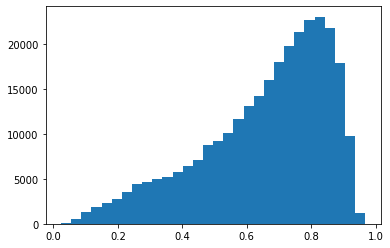

In [321]:
y_pred_proba = log.predict_proba(X_test)
plt.hist(y_pred_proba[:,1],bins=30)

/Users/thomasmathieu/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/thomasmathieu/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/thomasmathieu/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/thomasmathieu/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/thoma

,recall,precision
0.032443,1.000000,0.656695
0.032736,0.999998,0.656695
0.033108,0.999995,0.656695
0.033580,0.999994,0.656696
0.033764,0.999992,0.656697
...,...,...
0.968197,0.000011,1.000000
0.968248,0.000008,1.000000
0.968373,0.000006,1.000000
0.968560,0.000005,1.000000


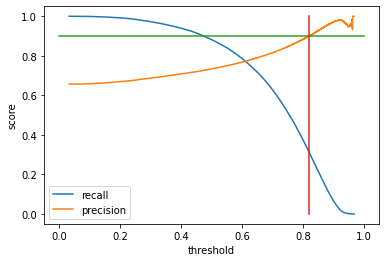

In [325]:
from sklearn.model_selection import cross_val_predict
y_predic=cross_val_predict(log,X,y,method='predict_proba',cv=10)
y_predic2=y_predic[:,1]  #on prend la 2e colonne, celle des probas de la classe 1

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y, y_predic2)

df_threshold=pd.DataFrame({'recall':recall[:-1], 'precision':precision[:-1]},index=thresholds)

#Computing the minimum threshold, considering required precision
required_precision = 0.9
minimum_required_threshold= df_threshold[df_threshold['precision']>required_precision].index[0]

df_threshold.plot()
plt.plot([0,1],[required_precision,required_precision])
plt.plot([minimum_required_threshold,minimum_required_threshold],[0,1])
plt.xlabel('threshold')
plt.ylabel('score')
df_threshold

In [326]:
from sklearn.metrics import roc_curve,roc_auc_score
roc_auc_score(y,y_predic2)

0.7467656352459217